# Regresión logística con un enfoque aplicado

Author: Jordi Joel Bardales Rojas


La regresión logística es un tipo de modelo de regresión utilizado en estadística y en machine learning para predecir la probabilidad de que un evento ocurra en función de un conjunto de variables predictoras. A diferencia de la regresión lineal, que se utiliza para predecir valores continuos, la regresión logística se utiliza para predecir valores discretos o cualitativos, como "si" o "no", "verdadero" o "falso", o "pertenece a una clase" o "no pertenece a una clase".

**Ejemplos**

1. Predecir si un paciente tiene una enfermedad cardiaca en función de sus síntomas, edad, sexo y otros factores.

2. Predecir si un candidato a un puesto de trabajo es apto en función de su currículum, carta de presentación y resultados de una entrevista.

3. Predecir si un correo es spam o no.

4. Predecir si un paciente con cáncer va a responder positivamente a un tratamiento en función de su edad, tipo de cáncer y otros factores.

**Aplicación**

Los datos mostrados nos permitirán saber la probabilidad de que un paciente tenga cáncer de próstata basados en la cantidad de PSA en su sangre. El antígeno prostático específico, o PSA, es una proteína producida por células normales y malignas de la glándula prostática. La prueba de PSA mide el nivel de PSA en la sangre. El nivel sanguíneo de PSA a menudo es elevado en personas con cáncer de próstata.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize


Conjunto de datos

In [20]:
X_ = np.array([3.8, 3.4, 2.9, 2.8, 2.7, 2.1, 1.6, 2.5, 2.0, 1.7, 1.4, 1.2, 0.9, 0.8]).reshape(-1, 1)
y = np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0.])


**Estimando la probabilidad de tener cáncer de próstata utilizando  regresión lineal**

Una regresión lineal no es apropiado en el caso de predecir probabilidades pues daría como resultado probabilidades negativas o mayores a 1.

$$\mathbf w = {(X^T X)}^{-1}X^T\mathbf y$$

In [21]:
X = np.c_[np.ones_like(X_), X_]

params = np.linalg.inv(X.T @ X) @ X.T @ y
line = lambda x: np.dot(params, [1, x])


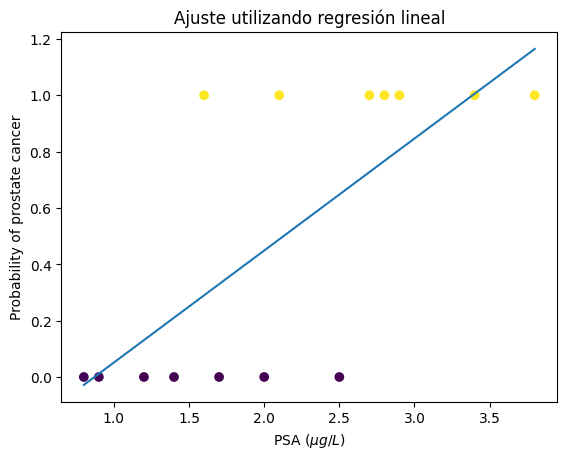

In [22]:
plt.scatter(x=X_, y=y, c=y, marker='o')
plt.title("Ajuste utilizando regresión lineal")
plt.ylabel("Probability of prostate cancer")
plt.xlabel("PSA ($\mu g/L$)")
plt.plot([0.8, 3.8], [line(0.8), line(3.8)])
plt.show()


**Estimando la probabilidad de tener cáncer de próstata utilizando regresión logística**

Queremos hallar la siguiente relacion $p(X) = \mathbb P(Y=1|X)$. Una buena forma de hacerlo es utilizando la función logistica cuyo rango está entre 0 y 1, en lugar de una lineal. Para ajustar ésta función se utiliza el método de máxima verosimilitud, el cual es utilizado cuando se quiere obtener o maximizar observación dada, que es lo que queremos en nuestro caso.


$$
\hat p(X_i) = \frac{e^{w_0 + w_1X_i}}{1 + e^{w_0 + w_1X_i}} = \frac{1}{1 + e^{-w_0 - w_1X_i}} 
$$

In [23]:
def p(x, w):
    return 1 / (1 + np.exp(-w[0] - w[1] * x))


**Estimando los coeficientes $w_0$ y $w_1$**

Como se mencionó anteriormente se utilizará la máxima verosimilitud para hallar los coeficientes.

$$
L(\mathbf w) = \prod_{y_i=1}p(x_i) \prod_{y_j=0}(1 - p(x_j))
$$

Tomando logaritmo 

$$l(\mathbf w) = \log(L(\mathbf w)) = \sum_{y_i=1}\log{(p(x_i))} + \sum_{y_{i'}=0}\log{(1 - p(x_{i'}))}$$

Para hallar el máximo valor de la  función $l$, se minimizará el negativo de la función, por lo tanto, luego de acomodar convenientemente, la función objetivo a minimizar, es la siguiente:

$$\min_\mathbf w \sum_{i=1}\left({-y_i\log{(\hat p(X_i))} - (1 - y_i)\log{(1 - \hat p(X_i))}}\right)$$

Esta última función se muestra en la documentación de librerías de aprendizaje automático como [`scikit-learn`](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)


In [24]:
def cost(w):
    return -np.dot(y, np.log(p(X_, w))) - np.dot(1 - y, np.log(1 - p(X_, w)))


In [25]:
solution = minimize(cost, [-10, 0.], method='nelder-mead')
solution.x

array([-5.75436986,  2.74690414])

**Coeficientes obtenidos con la librería sklearn**

In [36]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none').fit(X_, y)
print(clf.coef_, clf.intercept_)
clf.predict(X_)
clf.predict_proba(X_)

clf.score(X_, y)


[[2.74690788]] [-5.7543833]


0.8571428571428571

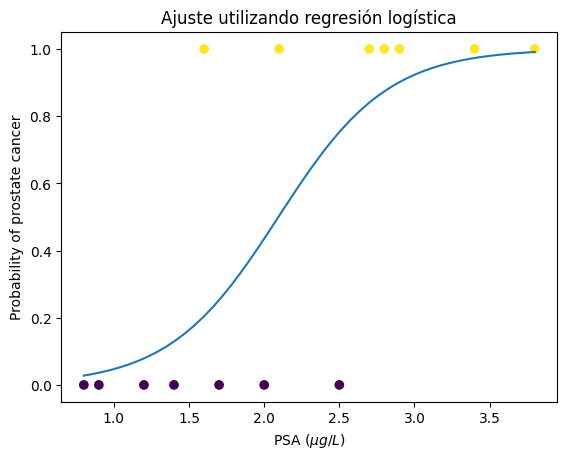

In [37]:
domain = np.linspace(0.8, 3.8)
plt.scatter(x=X_, y=y, c=y, marker='o')
plt.title("Ajuste utilizando regresión logística")
plt.ylabel("Probability of prostate cancer")
plt.xlabel("PSA ($\mu g/L$)")
plt.plot(domain, p(domain, solution.x))
plt.show()


**Conclusiones**

La regresion logistica predice cuando algo es verdadero o falso, mientras que la regresión lineal predice cuando algo es continuo.
La regresion ajusta una función logística a los datos en lugar de una lineal cuyo valor indica la probabilidad con que un valor pertenece a una determinada clase (verdadero o falso)
Para hallar la curva logística que se ajusta a los datos se utiliza máximum likelihood. 


**Referencias**

[1] Prostate-Specific Antigen (PSA) Test https://www.cancer.gov/types/prostate/psa-fact-sheet